# Report
---
This project is based on [p3_collab-compet Udacity project repo](https://github.com/udacity/deep-reinforcement-learning/tree/master/p3_collab-compet). The immplementation uses the Multi-Agent DDPG (Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments) architecture (https://arxiv.org/abs/1706.02275). An additional implementation using combined experience replay (CER) is added (https://arxiv.org/abs/1712.01275). In contrast to multiple but 'same' agents case, CER does not work for collaborative multi-agent environment.

## State and Action Spaces
In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Each agent receives its own, local observation.  Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

The task is episodic, and in order to solve the environment, your agents must get an average score of +0.5 (over 100 consecutive episodes, after taking the maximum over both agents). Specifically,

- After each episode, we add up the rewards that each agent received (without discounting), to get a score for each agent. This yields 2 (potentially different) scores. We then take the maximum of these 2 scores.
- This yields a single **score** for each episode.

The environment is considered solved, when the average (over 100 episodes) of those **scores** is at least +0.5.

## Architecture
The architecture leverages works from previous project (DDPG). The top level Multi-Agent entity is built on top of two DDPG agents with a combined Replay Buffer. Each of lower level DDPG agent uses the Actor-Critics architecture similar to previous project without Replay Buffer. Top level agent performs agent step/remember/learn functions by calling lower level agent functions. The reason for this architecture is the key assumption of the algorithm. Each agent knows the state space and actions from all other agents.  


## Learning Algorithm
At each episodical training step, the top-level agent first saves observations using a large-size Replay Buffer of (long) past experiences and optionally another small-size Replay Buffer of recent experiences, respectively. Then, the agent draws random sample samples from these buffers and passes on agent-specific (identified by id) experience to lower level DDPG agents to learn. To explore environment, a stochastic Ornstein–Uhlenbeck process is added output action. The training is episodic. Training completes when the average (over 100 episodes) of **scores** is at least +0.5.


### Training Parameters
- n_episodes (int): maximum number of training episodes (default 8000).
- Option to use CER: True/False (default).

### Top-level Agent Hyper Parameters
- BUFFER_SIZE (int): large replay buffer size
- CER_SIZE (int): small replay buffer for recent experiences
- BATCH_SIZE (int): mini batch size

### DDPG Agent Hyper Parameters
- GAMMA (float): discount factor
- TAU (float): for soft update of target parameters
- LR_ACTOR (float): learning rate for optimizer
- LR_CRITIC (float): learning rate for optimizer
- WEIGHT_DECAY (float): L2 weight decay
- N_LEARN_UPDATES (int): number of learning updates
- N_TIME_STEPS (int): every n time step do update


Where 
`BUFFER_SIZE = int(1e6)`, `CER_SIZE = int(8e4)`, `BATCH_SIZE = 128`, `GAMMA = 0.99`, `TAU = 1e-3`, `LR_ACTOR = 1e-4`, `LR_CRITIC = 1e-4`, `WEIGHT_DECAY = 0.0`, `UPDATE_EVERY = 1`,`NUM_UPDATES = 5` 


### Neural Networks

The Actor networks has three layers. The first two are fully connected with 256 units each with relu activation. The third layer has tanh activation for the action space. The network has state size as input dimention.

The Critic networks has three layers. The first two are fully connected with 256 units each with relu activation. The first layer has state size as input dimention. The second layer accepts action size in addition to the output of the first layer. 

### CER Improvement Ideas and Implementation

The size of the Replay Buffer has material impacts on agents' performance. Large buffer breaks correlation between sequential samples but makes agents learn from long-ago history. Small buffer has the opposite effect. A technique calles [Combined Experience Replay (CER)](https://arxiv.org/abs/1712.01275) addresses this problem by using two buffers with different sizes simultaneously. 

In my implementation (shown below), Replay Buffer 1 has a large size (1000,000) and Replay Buffer 2 is tiny (80,000). The second buffer is design to keep most recent experiences. Older experiences are overwritten with new ones when the buffer size exceeds its maximum using Python FIFO data structure (deque). The CER implementation has shown improvement in many, but identical, agents environment. Suprisingly, CER clearly **underperforms** in this colaborative multi-agent case (see Plot of rewards below).

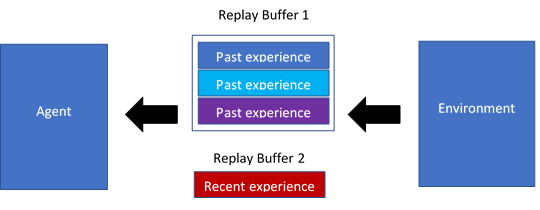

In [2]:
from IPython.display import Image
Image(filename='architecture.png')

### Other Improvement Ideas
Other improvement ideas include:
1. Agents policy approximation. The key assumption for this implementation is each agent fully knows the states and actions of others. This is a strong assumption. An approximation is to use approximation of agents true policy.
2. Use prioritized replayed-buffer for top-level agent. 

## Plot of rewards
Without CER Replay Buffer, the performance goal is reached at episode 1857. With CER Replay Buffer, the learning curve is much slower, and performance goal is not reached at this eposide.
<img src="Scores.png">